<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/statistical_relationship_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code will load in a data set corresponding to the 2024 WNBA season. If you need to know what the variables mean you can find the original dataset [here](https://www.basketball-reference.com/wnba/years/2024_per_game.html):

### **Clone Business Analytics Repository**

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 750, done.
remote: Counting objects: 100% (367/367), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 750 (delta 300), reused 234 (delta 213), pack-reused 383 (from 1)
Receiving objects: 100% (750/750), 9.70 MiB | 8.91 MiB/s, done.
Resolving deltas: 100% (428/428), done.


### **Import Libraries**

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import math

### **Read In the Dataset**

In [3]:
df = pd.read_csv('/content/business-analytics/datasets/sportsref_download.csv')
df.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Lindsay Allen,CHI,G,39,925,39,27,23.7,2.6,5.5,0.472,0.4,1.2,0.311,2.3,4.4,0.515,1.1,1.3,0.808,0.3,2.0,3.9,0.8,0.2,1.6,1.6,6.7
1,Rebecca Allen,PHO,F-G,18,447,18,18,24.8,2.9,7.1,0.417,1.4,3.9,0.352,1.6,3.1,0.500,0.1,0.2,0.667,0.7,3.9,1.1,0.9,0.7,1.0,1.9,7.4
2,Laeticia Amihere,ATL,F,15,73,15,0,4.9,0.4,1.6,0.250,0.0,0.0,NaN,0.4,1.6,0.250,0.3,1.1,0.294,0.8,1.7,0.2,0.1,0.2,0.4,0.5,1.1
3,Ariel Atkins,WAS,G,39,1175,39,39,30.1,5.4,12.5,0.432,1.9,5.5,0.346,3.5,7.0,0.500,2.2,2.5,0.848,0.9,3.5,3.1,1.4,0.4,2.3,2.8,14.9
4,Amy Atwell,PHO,F,5,41,5,0,8.2,0.6,2.2,0.273,0.4,1.8,0.222,0.2,0.4,0.500,0.2,0.2,1.000,0.6,0.8,0.6,0.0,0.2,0.4,0.6,1.8


### **Create Numerical Encoding for Positions**

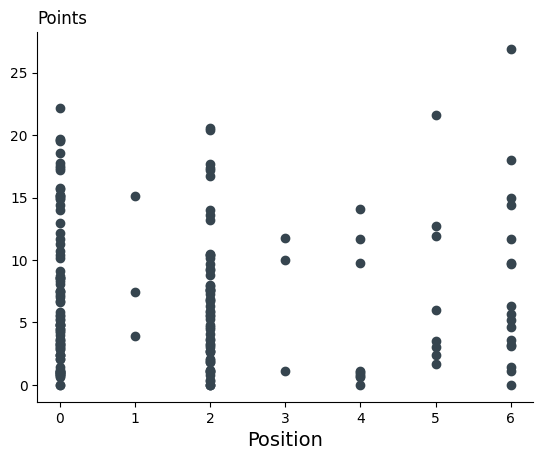

In [4]:
my_dict = {v:k for k,v in enumerate(pd.unique(df['Pos']))}
df['Pos_num'] = df['Pos'].map(my_dict)
plt.scatter(df['Pos_num'], df['PTS'], color="#36454F")
plt.title('Points', loc='left')
plt.xlabel("Position", size=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

### **Correlation Coefficient**

In [5]:
df['Pos_num'].corr(df['PTS'])

-0.006077046237555266

### **For Loop**

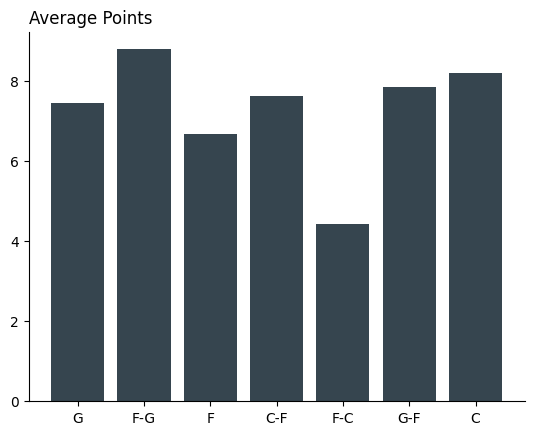

In [6]:
results = []
for pos in pd.unique(df['Pos']):  #'pd.unique(df['Pos']) creates a list-like object of all the possible values in df['Pos']
	condition = df['Pos'] == pos
	new_df = df[condition]
	avg = new_df['PTS'].mean()
	results.append(avg)

plt.bar(pd.unique(df['Pos']), results, color="#36454F")
plt.title('Average Points', loc='left')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()